In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data_lines = []
cp_lines = []

with open("tesco2.csv", "r") as f:
    for line in f:
        line = line.strip()
        if line.startswith("CP"):
            # Remove 'CP ' prefix and split
            cp_values = line[3:].split(',')
            cp_lines.append([int(v.strip()) for v in cp_values])
        else:
            values = line.split(',')
            data_lines.append([int(v.strip()) for v in values])

# Convert to DataFrames
df_data = pd.DataFrame(data_lines, columns=[
    "time_ms",
    "Vrms_mV",
    "Irms_mA",
    "Energy_Wh",
    "RealPower_W",
    "ApparentPower_W",
    "PF_x1000"
])

df_cp = pd.DataFrame(cp_lines, columns=[
    "time_ms",                 # HAL_GetTick()
    "CP_High_Vx100",           # evse_cp_high_Vx100
    "CP_Low_Vx100",            # evse_cp_low_Vx100
    "Duty_x100",               # evse_cp_duty_x100
    "Freq_x10",                # evse_cp_freq_x10
    "DebouncedState",          # evse_cp_debounce_read_state
    "CurrentLimit_x100",       # evse_cp_cur_amp_limit_x100
    "evse_isPLC"                    # evse_isPLC (bool or int)
])

# Show preview
print("Main Data:")
print(df_data)
# print("\nCP Data:")
# print(df_cp.tail())

df_data["PF"] = df_data["PF_x1000"] / 1000



# --- Scale CP data ---
df_cp["CP_High_V"] = df_cp["CP_High_Vx100"] / 100
df_cp["CP_Low_V"] = df_cp["CP_Low_Vx100"] / 100
df_cp["Duty_Percent"] = df_cp["Duty_x100"] / 100
df_cp["Freq_Hz"] = df_cp["Freq_x10"] / 10
df_cp["CurrentLimit_A"] = df_cp["CurrentLimit_x100"] / 100

# --- Scale Main data ---
df_data["PF"] = df_data["PF_x1000"] / 1000



Main Data:
      time_ms  Vrms_mV  Irms_mA  Energy_Wh  RealPower_W  ApparentPower_W  \
0      364247   205587       58        197            6               12   
1      364414   205590       59        197            6               12   
2      364580   205591       59        197            6               12   
3      364747   205586       58        197            6               12   
4      364914   205533       58        197            6               12   
...       ...      ...      ...        ...          ...              ...   
1910   682555   206566       48        394            4               10   
1911   682722   206538       47        394            4                9   
1912   682888   206499       47        394            4                9   
1913   683055   206483       47        394            4                9   
1914   683223   205979       47        394            4                9   

      PF_x1000  
0          556  
1          558  
2          561  
3       

In [20]:
def merge_nearest(main_df, other_df, on='time', by=None,
                  tolerance=None, suffix='_y'):
    """
    Nearest-time join: keep all rows of main_df, add columns from other_df
    whose `on` timestamp is closest (optionally per key in `by`).

    - `on`: timestamp/number column present in both DFs
    - `by`: column name or list of keys to match (optional)
    - `tolerance`: max allowed gap; use Timedelta/np.timedelta64 for datetime,
                   or a numeric for numeric time. If None, always take nearest.
    """
    # merge_asof requires both frames sorted by the 'on' column (and by keys if used)
    if by is None:
        main_sorted  = main_df.sort_values(on)
        other_sorted = other_df.sort_values(on)
    else:
        main_sorted  = main_df.sort_values(by + [on] if isinstance(by, list) else [by, on])
        other_sorted = other_df.sort_values(by + [on] if isinstance(by, list) else [by, on])

    out = pd.merge_asof(
        main_sorted, other_sorted,
        on=on,
        by=by,
        direction='nearest',
        tolerance=tolerance,
        suffixes=('', suffix)
    )
    return out

# Example usage (numeric time):
df_data = merge_nearest(df_data, df_cp, on='time_ms', tolerance=300)  # allow ±300 units


columns_to_print = [
    "time_ms",
    "Vrms_mV",
    "Irms_mA",
    "Energy_Wh",
    "DebouncedState",
    "CP_High_Vx100",
    "Duty_x100"
]

# for _, row in df_data[columns_to_print].iterrows():
#     print(", ".join(str(row[col]) for col in columns_to_print))

columns_to_print = [
    "time_ms",
    "CP_High_Vx100",
    "CP_Low_Vx100",
    "Duty_x100",
    "Freq_x10",
    "DebouncedState",
    "CurrentLimit_x100"
]

for _, row in df_cp[columns_to_print].iterrows():
    print(", ".join(str(row[col]) for col in columns_to_print))


364112, 1269, 1260, 0, 0, 1, 0
364212, 1269, 1260, 0, 0, 1, 0
364312, 1269, 1260, 0, 0, 1, 0
364412, 1269, 1261, 0, 0, 1, 0
364512, 1269, 1260, 0, 0, 1, 0
364612, 1269, 1260, 0, 0, 1, 0
364712, 1269, 1261, 0, 0, 1, 0
364812, 1269, 1256, 0, 0, 1, 0
364912, 1269, 1261, 0, 0, 1, 0
365012, 1271, 1260, 0, 0, 1, 0
365112, 1269, 1260, 0, 0, 1, 0
365212, 1269, 1256, 0, 0, 1, 0
365312, 1269, 1260, 0, 0, 1, 0
365412, 1271, 1261, 0, 0, 1, 0
365512, 1269, 1261, 0, 0, 1, 0
365612, 1269, 1260, 0, 0, 1, 0
365712, 1269, 1261, 0, 0, 1, 0
365812, 1269, 1260, 0, 0, 1, 0
365912, 1269, 1260, 0, 0, 1, 0
366012, 1269, 1260, 0, 0, 1, 0
366112, 1269, 1260, 0, 0, 1, 0
366212, 1269, 1260, 0, 0, 1, 0
366312, 1269, 1261, 0, 0, 1, 0
366412, 1269, 1260, 0, 0, 1, 0
366512, 1269, 1261, 0, 0, 1, 0
366612, 1269, 1260, 0, 0, 1, 0
366712, 1269, 1260, 0, 0, 1, 0
366812, 1269, 1261, 0, 0, 1, 0
366912, 1269, 1260, 0, 0, 1, 0
367012, 1269, 1260, 0, 0, 1, 0
367112, 1269, 1256, 0, 0, 1, 0
367212, 1269, 1260, 0, 0, 1, 0
367312, 

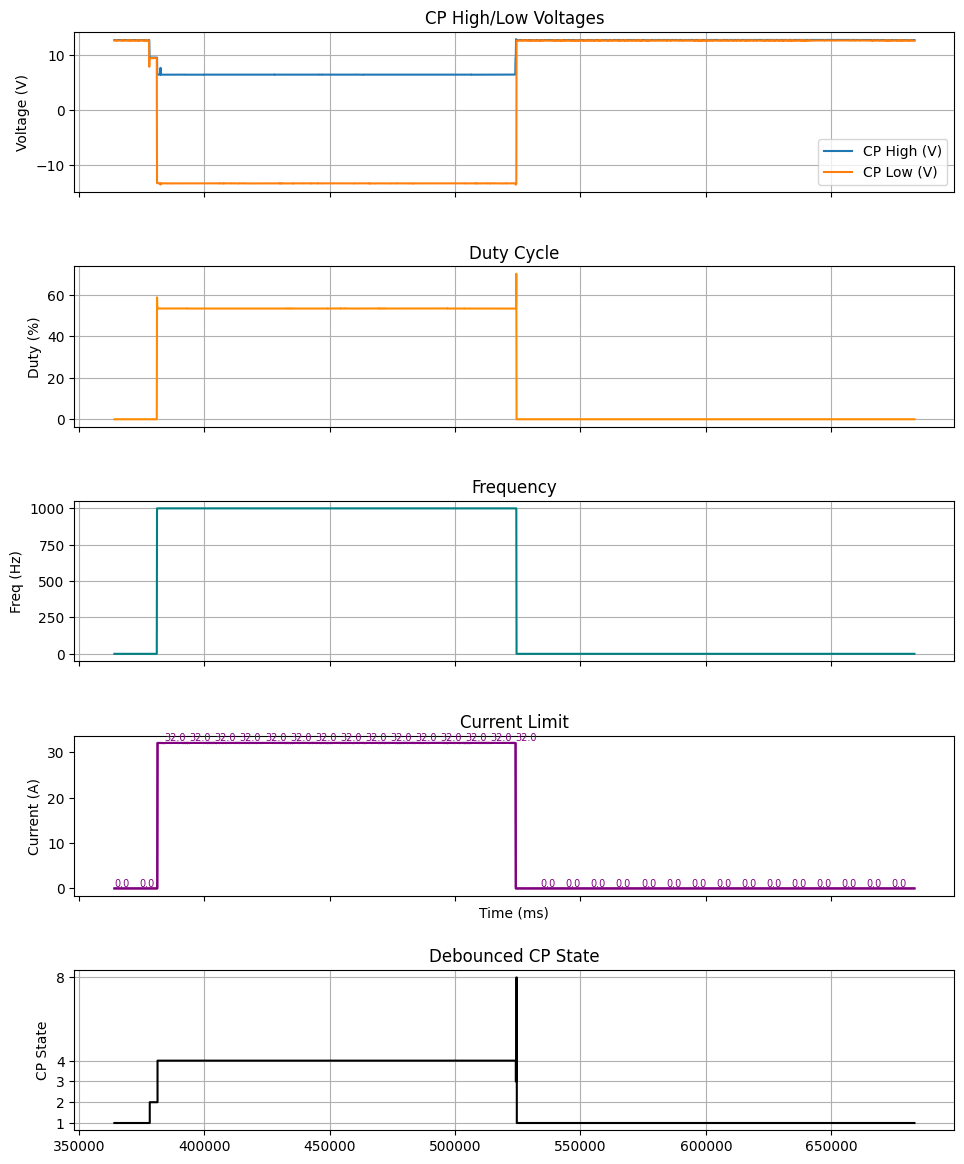

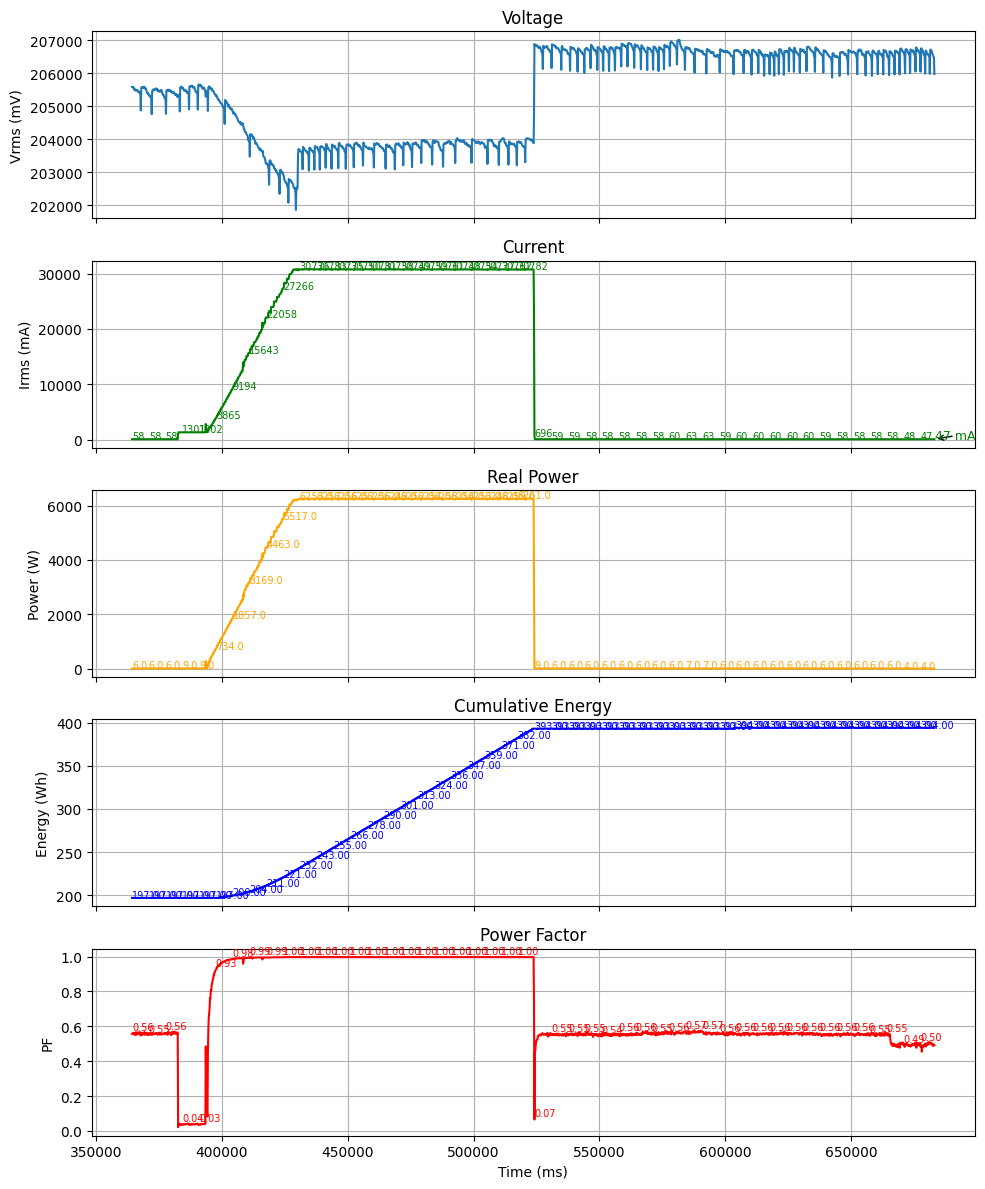

In [21]:
# ================================
# PLOT GROUP 1: CP Signals
# ================================
fig1, axs1 = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

axs1[0].plot(df_cp["time_ms"], df_cp["CP_High_V"], label="CP High (V)")
axs1[0].plot(df_cp["time_ms"], df_cp["CP_Low_V"], label="CP Low (V)")
axs1[0].set_ylabel("Voltage (V)")
axs1[0].set_title("CP High/Low Voltages")
axs1[0].legend()
axs1[0].grid()

axs1[1].plot(df_cp["time_ms"], df_cp["Duty_Percent"], color='darkorange')
axs1[1].set_ylabel("Duty (%)")
axs1[1].set_title("Duty Cycle")
axs1[1].grid()

axs1[2].plot(df_cp["time_ms"], df_cp["Freq_Hz"], color='teal')
axs1[2].set_ylabel("Freq (Hz)")
axs1[2].set_title("Frequency")
axs1[2].grid()

axs1[3].plot(df_cp["time_ms"], df_cp["CurrentLimit_A"], color='purple')
axs1[3].set_ylabel("Current (A)")
axs1[3].set_xlabel("Time (ms)")
axs1[3].set_title("Current Limit")
axs1[3].grid()


# Plot CP current limit
axs1[3].plot(df_cp["time_ms"], df_cp["CurrentLimit_A"], color='purple')
axs1[3].set_ylabel("Current (A)")
axs1[3].set_xlabel("Time (ms)")
axs1[3].set_title("Current Limit")
axs1[3].grid()

for i in range(0, len(df_cp), 100):
    x = df_cp["time_ms"].iloc[i]
    y = df_cp["CurrentLimit_A"].iloc[i]
    axs1[3].annotate(f"{y:.1f}", xy=(x, y), xytext=(x, y + 0.5),
                     fontsize=7, color='purple')
    
# [4] Debounced CP State
axs1[4].plot(df_cp["time_ms"], df_cp["DebouncedState"], drawstyle="steps-post", color='black')
axs1[4].set_ylabel("CP State")
axs1[4].set_title("Debounced CP State")
axs1[4].set_yticks(sorted(df_cp["DebouncedState"].unique()))
axs1[4].grid()


fig1.tight_layout(pad=2.0)













# ================================
# PLOT GROUP 2: Main Electrical Data
# ================================
fig2, axs2 = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

axs2[0].plot(df_data["time_ms"], df_data["Vrms_mV"], label="Vrms (mV)")
axs2[0].set_ylabel("Vrms (mV)")
axs2[0].set_title("Voltage")
axs2[0].grid()

# Plot Irms
axs2[1].plot(df_data["time_ms"], df_data["Irms_mA"], label="Irms (mA)", color='green')
axs2[1].set_ylabel("Irms (mA)")
axs2[1].set_title("Current")
axs2[1].grid()

# Annotate latest Irms
last_idx_irms = df_data.index[-1]
x = df_data["time_ms"][last_idx_irms]
y = df_data["Irms_mA"][last_idx_irms]
axs2[1].annotate(f"{y:.0f} mA", xy=(x, y), xytext=(x + 100, y),
                 arrowprops=dict(arrowstyle="->"), fontsize=9, color='green')

axs2[2].plot(df_data["time_ms"], df_data["RealPower_W"], label="Real Power (W)", color='orange')
axs2[2].set_ylabel("Power (W)")
axs2[2].set_title("Real Power")
axs2[2].grid()

axs2[3].plot(df_data["time_ms"], df_data["Energy_Wh"], label="Energy (Wh)", color='blue')
axs2[3].set_ylabel("Energy (Wh)")
axs2[3].set_title("Cumulative Energy")
axs2[3].grid()



axs2[4].plot(df_data["time_ms"], df_data["PF"], label="Power Factor", color='red')
axs2[4].set_ylabel("PF")
axs2[4].set_xlabel("Time (ms)")
axs2[4].set_title("Power Factor")
axs2[4].grid()



for i in range(0, len(df_data), 40):
    x = df_data["time_ms"].iloc[i]
    y = df_data["Irms_mA"].iloc[i]
    axs2[1].annotate(f"{y:.0f}", xy=(x, y), xytext=(x, y + 20),
                     fontsize=7, color='green')


for i in range(0, len(df_data), 40):
    x = df_data["time_ms"].iloc[i]
    y = df_data["Energy_Wh"].iloc[i]
    axs2[3].annotate(f"{y:.2f}", xy=(x, y), xytext=(x, y + 0.02),
                     fontsize=7, color='blue')
    
for i in range(0, len(df_data), 40):
    x = df_data["time_ms"].iloc[i]
    y = df_data["PF"].iloc[i]
    axs2[4].annotate(f"{y:.2f}", xy=(x, y), xytext=(x, y + 0.02),
                     fontsize=7, color='red')
    
for i in range(0, len(df_data), 40):
    x = df_data["time_ms"].iloc[i]
    y = df_data["RealPower_W"].iloc[i]
    axs2[2].annotate(f"{y:.1f}", xy=(x, y), xytext=(x, y + 2),
                     fontsize=7, color='orange')
    
fig2.tight_layout()
plt.show()